In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# 一樣把檔案匯入進來
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 再把圖轉成0~1之間

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

train_history =model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 20s 47ms/step - loss: 0.0332 - accuracy: 0.9886 - val_loss: 0.0266 - val_accuracy: 0.9930
Epoch 2/15
422/422 [==============================] - 20s 48ms/step - loss: 0.0320 - accuracy: 0.9892 - val_loss: 0.0258 - val_accuracy: 0.9927
Epoch 3/15
422/422 [==============================] - 20s 48ms/step - loss: 0.0304 - accuracy: 0.9899 - val_loss: 0.0302 - val_accuracy: 0.9927
Epoch 4/15
422/422 [==============================] - 21s 51ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0293 - val_accuracy: 0.9927
Epoch 5/15
422/422 [==============================] - 21s 50ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0276 - val_accuracy: 0.9920
Epoch 6/15
422/422 [==============================] - 21s 50ms/step - loss: 0.0272 - accuracy: 0.9908 - val_loss: 0.0264 - val_accuracy: 0.9928
Epoch 7/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.0290 - val_accuracy:

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

result=model.predict(x_test,batch_size=128)
print("原始值:",np.argmax(y_test[:30],axis=1))
print("預測值:",np.argmax(result[:30],axis=1))


Test loss: 0.021838579326868057
Test accuracy: 0.9926999807357788
原始值: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
預測值: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4 9 6 6 5 4 0 7 4 0 1]


In [8]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

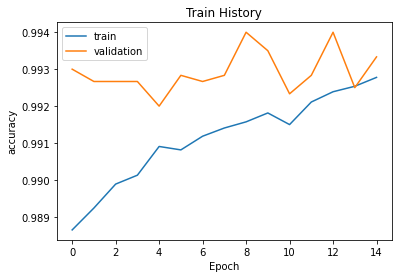

In [10]:
show_train_history(train_history,'accuracy','val_accuracy')

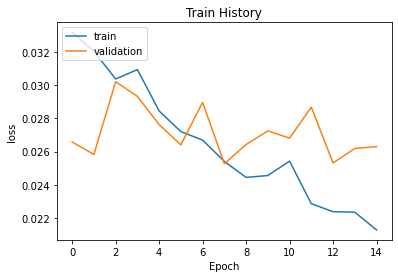

In [11]:
show_train_history(train_history,'loss','val_loss')

In [16]:
#保存訓練模型
model_filename="./model2.h5"
model.save(model_filename)